In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

### load and review the dataset

In [3]:
df=pd.read_csv("bank-additional-full.csv", delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
#displaying all the columns
pd.set_option('display.max_columns', None)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.shape

(41188, 21)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
df.dtypes
#datatypes of the columns

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [9]:
df.isnull().sum()
#checking the missing values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


<AxesSubplot:xlabel='marital', ylabel='count'>

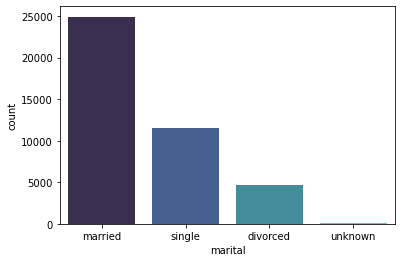

In [11]:
sns.countplot(x="marital",data=df,palette="mako")

In [12]:
from sklearn import preprocessing

In [13]:
label_encoder = preprocessing.LabelEncoder()
#converting categorical columns into numerical columns

In [14]:
label_df=["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"]

In [15]:
df[label_df]=df[label_df].apply(label_encoder.fit_transform)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int32  
 3   education       41188 non-null  int32  
 4   default         41188 non-null  int32  
 5   housing         41188 non-null  int32  
 6   loan            41188 non-null  int32  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int32  
 9   day_of_week     41188 non-null  int32  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int32  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<AxesSubplot:xlabel='marital', ylabel='y'>

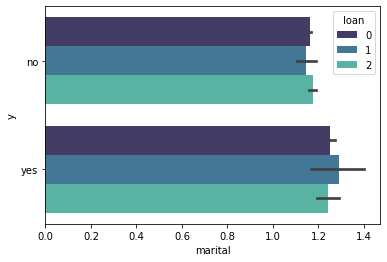

In [16]:
sns.barplot(x='marital',y='y',hue='loan',data=df,palette='mako')

<AxesSubplot:xlabel='job', ylabel='y'>

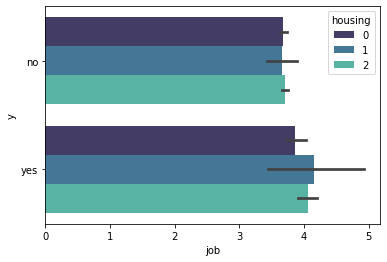

In [17]:
sns.barplot(x='job',y='y',hue='housing',data=df,palette='mako')

<AxesSubplot:>

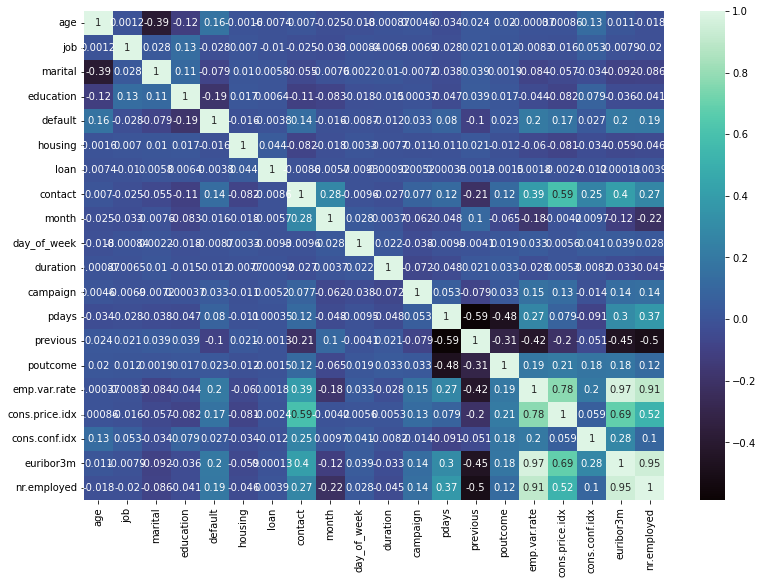

In [18]:
f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(df.corr(),cmap='mako',annot=True)

In [19]:
df.shape

(41188, 21)

### Train model

In [20]:
x=df.drop(labels=["y"] , axis=1)
y=df["y"]
x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, random_state=0)
#splitting the data for training and testing

In [22]:
clf = svm.SVC(kernel='linear',gamma=0.025, C=4)  

In [23]:
clf.fit(x_train , y_train)

SVC(C=4, gamma=0.025, kernel='linear')

In [24]:
clf.score(x_train , y_train)

0.8993498610698967

In [25]:
clf.score(x_test,y_test)

0.8982762806506434

In [26]:
y_pred = clf.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8982762806506434


In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3474,  191],
       [ 228,  226]], dtype=int64)

<AxesSubplot:>

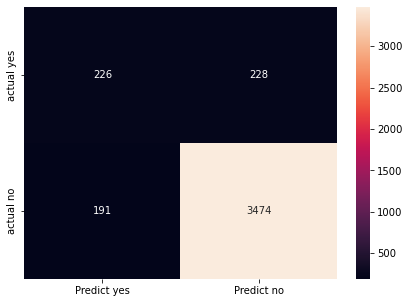

In [29]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred, labels=["yes", "no"])

df_cm = pd.DataFrame(cm, index = [i for i in ["actual yes","actual no"]],
                  columns = [i for i in ["Predict yes","Predict no"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

### INFERENCE ABOUT THE MODEL BEFORE SCALING

In [30]:
#True Positive (TP) = 226; meaning 226 positive class data points were correctly classified by the model
#True Negative (TN) = 3474; meaning 3474 negative class data points were correctly classified by the model
#False Positive (FP) = 191; meaning 191 negative class data points were incorrectly classified as belonging to the positive class by the model
#False Negative (FN) = 228; meaning 228 positive class data points were incorrectly classified as belonging to the negative class by the model
#This turned out to be a pretty decent classifier for our dataset considering the relatively larger number of true positive and true negative values.
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test, y_pred))
#this model gives very good model performance.


              precision    recall  f1-score   support

          no       0.94      0.95      0.94      3665
         yes       0.54      0.50      0.52       454

    accuracy                           0.90      4119
   macro avg       0.74      0.72      0.73      4119
weighted avg       0.89      0.90      0.90      4119



In [32]:
#standard scaling
from sklearn.preprocessing import StandardScaler    
s_x= StandardScaler()    
X1_train= s_x.fit_transform(x_train)    
X1_test= s_x.transform(x_test)

In [33]:
from sklearn import svm
classifier= svm.SVC(random_state=2)  
classifier.fit(X1_train, y_train)

SVC(random_state=2)

In [34]:
model=svm.SVC(kernel='rbf',gamma=0.025, C=4)
model.fit(X1_train,y_train)

SVC(C=4, gamma=0.025)

In [35]:
model.score(X1_test,y_test)

0.9121145909201263

In [37]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8982762806506434


In [38]:
y1_pred = classifier.predict(X1_test)

<AxesSubplot:>

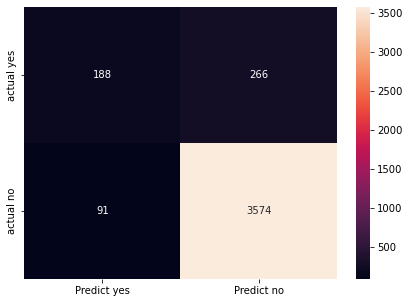

In [39]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y1_pred, labels=["yes", "no"])

df_cm = pd.DataFrame(cm, index = [i for i in ["actual yes","actual no"]],
                  columns = [i for i in ["Predict yes","Predict no"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [40]:
#True Positive (TP) = 188; meaning 188 positive class data points were correctly classified by the model
#True Negative (TN) = 3574; meaning 3574 negative class data points were correctly classified by the model
#False Positive (FP) = 91; meaning 191 negative class data points were incorrectly classified as belonging to the positive class by the model
#False Negative (FN) = 266; meaning 228 positive class data points were incorrectly classified as belonging to the negative class by the model
#This turned out to be a pretty decent classifier for our dataset considering the relatively larger number of true positive and true negative values.

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y1_pred))
#this model gives very good model performance.

              precision    recall  f1-score   support

          no       0.93      0.98      0.95      3665
         yes       0.67      0.41      0.51       454

    accuracy                           0.91      4119
   macro avg       0.80      0.69      0.73      4119
weighted avg       0.90      0.91      0.90      4119

